<a href="https://colab.research.google.com/github/FrancoGalfrascoli/CSE---437-/blob/main/lab5_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5: Value-Function Approximation


## Exercise 1 SGD
Many real-world processes can be modeled as nonlinear relationships, and SGD is a standard tool to fit those models from data.  

**Example: Predicting energy consumption in a building**  
- Energy usage depends on **temperature**, **time of day**, and **occupancy**.  
- If you plot the data, the relationship might not be linear — it curves.  
- A simple way to approximate this nonlinear relation is to fit a **polynomial function** of temperature (or time).  

Now, imagine you’re collecting data continuously:  
- You get one data point (temperature, usage) at a time.  
- Instead of waiting to collect all data and computing a full batch update, you update your model incrementally with **SGD**.  
- This makes your learning **online, adaptive, and scalable** — just like in reinforcement learning.  

---

In this exercise, approximating a cubic polynomial is a simplified version of **predicting a nonlinear real-world phenomenon**.


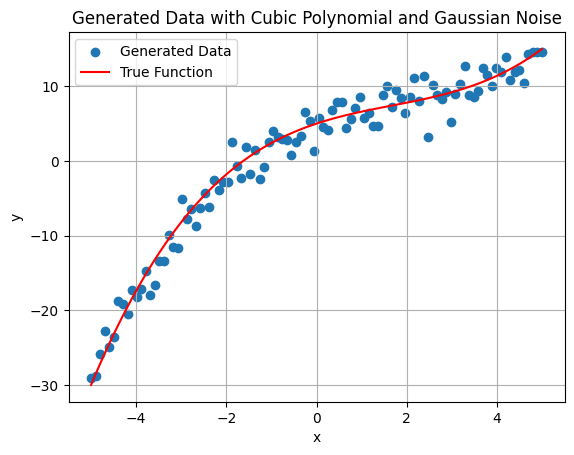

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data based on a cubic polynomial with Gaussian noise
np.random.seed(42)  # for reproducibility
n_samples = 100
x = np.linspace(-5, 5, n_samples)
# Define the true cubic polynomial function
def true_function(x):
  return 0.1 * x**3 - 0.5 * x**2 + 2 * x + 5

y_true = true_function(x)
noise = np.random.normal(0, 2, n_samples)  # Gaussian noise with mean 0 and std dev 2
y = y_true + noise

# Optional: Plot the generated data
plt.scatter(x, y, label='Generated Data')
plt.plot(x, y_true, color='red', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data with Cubic Polynomial and Gaussian Noise')
plt.legend()
plt.grid(True)
plt.show()

Based on the given a dataset of input–output pairs `(x, y)` where the underlying relationship is approximately polynomial.  

a. Use a **linear model with polynomial features**: Write a function that takes an input `x` and a weight vector `w`, and return the predicted value y_hat.    
   
   - y_hat(x; w) = w0 + w1 * x + w2 * x^2 + w3 * x^3  

   where w0, w1, w2, w3 are the parameters to be learned.

b. **Loss function (Mean Squared Error)**:
   Write a function that computes the loss for one training point `(x, y)`:

     - Formula: `loss = 0.5 * (y - y_hat)**2`

c. **SGD update**:   Derive the gradient of the loss with respect to each parameter (w0, w1, w2, w3).  
   - Write a function:  

     ```python
     def sgd_update(x, y, w, alpha):
         """
         Perform one SGD update for a single training example.
         Input:
             x (float) - input value
             y (float) - true output
             w (np.array) - current weights
             alpha (float) - learning rate
         Output:
             w (np.array) - updated weights
         """
         # TODO: compute prediction, gradient, and update weights
         return w
     ```
d. **Training loop**:
   - Loop over the dataset.  
   - At each step, update the weights using `sgd_update`.  
   - Track the training loss after each iteration.  

e. **Comparison with different learning rates**  
   - Train your model using at least three different learning rates, for example:  
     - alpha = 0.001  
     - alpha = 0.01  
     - alpha = 0.1  
   - Plot training loss vs iteration for each learning rate.  
   - Plot the final fitted polynomial curves for each learning rate on the same graph with the true dataset.

---

### Deliverables
- Code for `predict`, `mse_loss`, and `sgd_update`.  
- Training loop that runs with multiple learning rates.  
- Plot of training loss vs iteration for each learning rate.  
- Plot of the fitted polynomial vs dataset for each learning rate.  
- A short discussion:
  - How does the learning rate affect convergence speed and stability?  
  - Which learning rate gives the best balance between speed and accuracy?  

Final weights: [nan nan nan nan]
Training with alpha = 0.001 = 1.0202016830444336


/tmp/ipython-input-1552936124.py:10: RuntimeWarning: overflow encountered in scalar power
  return 0.5 * (y - y_hat)**2
/tmp/ipython-input-1552936124.py:7: RuntimeWarning: overflow encountered in scalar multiply
  return w0 + w1*x + w2*x**2 + w3*x**3
/tmp/ipython-input-1552936124.py:25: RuntimeWarning: invalid value encountered in add
  w = w + alpha * (y - y_hat) * np.array([1, x, x**2, x**3])


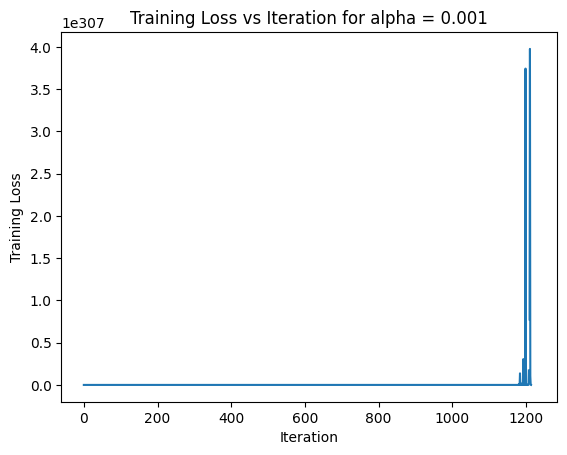

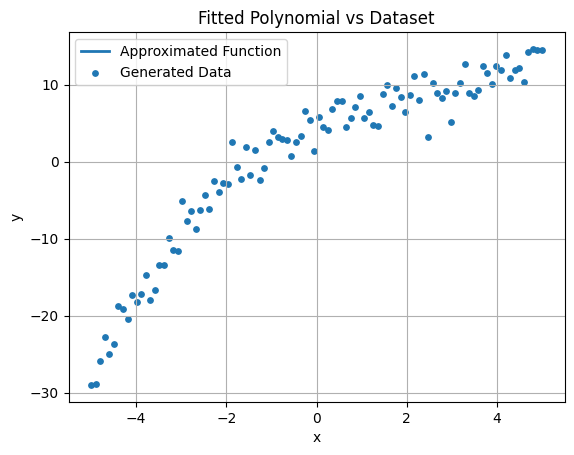

Final weights: [ 4.60837743  2.34151336 -0.46996244  0.07208275]
Training with alpha = 0.0001 = 1.0235645771026611


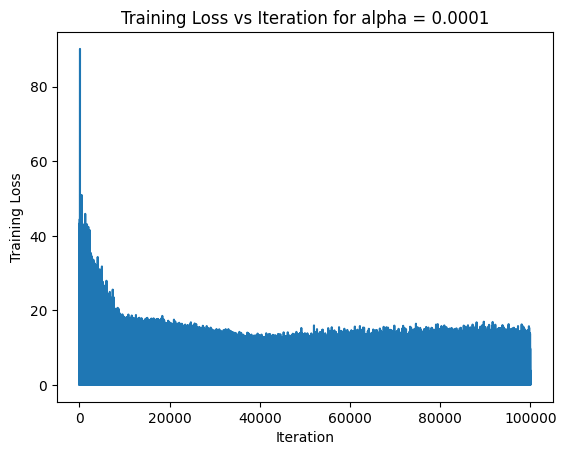

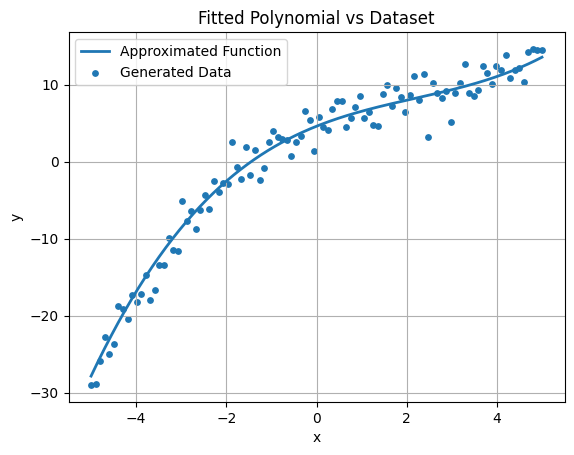

Final weights: [ 1.66502896  1.74450412 -0.28953626  0.11673868]
Training with alpha = 1e-05 = 0.9949891567230225


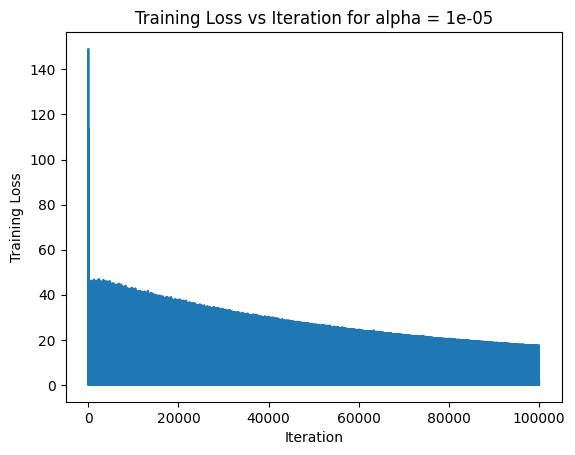

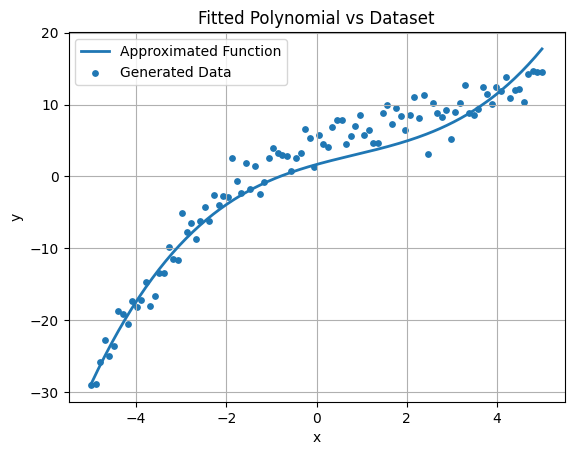

Final weights: [ 0.19090767  0.30679671 -0.19200978  0.19098869]
Training with alpha = 1e-06 = 1.0160174369812012


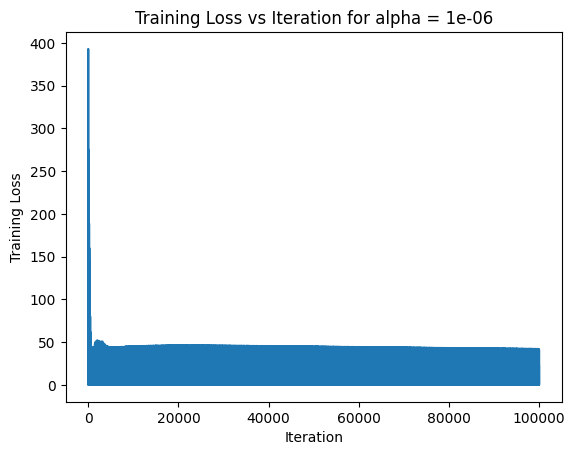

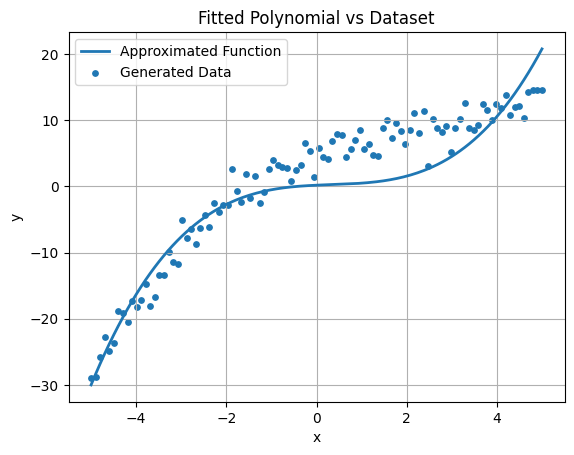

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def predict(x, w):
    w0, w1, w2, w3 = w
    return w0 + w1*x + w2*x**2 + w3*x**3

def mse_loss(y, y_hat):
    return 0.5 * (y - y_hat)**2

def sgd_update(x, y, w, alpha):
    """
    Perform one SGD update for a single training example.
    Input:
        x (float) - input value
        y (float) - true output
        w (np.array) - current weights
        alpha (float) - learning rate
    Output:
        w (np.array) - updated weights
    """
    # TODO: compute prediction, gradient, and update weights
    y_hat = predict(x, w)
    w = w + alpha * (y - y_hat) * np.array([1, x, x**2, x**3])
    return w

alpha_list = [1e-3, 1e-4, 1e-5, 1e-6]
n_epochs = 1000

for alpha in alpha_list:
    time_start = time.time()
    w = np.array([0,0,0,0])
    losses = []
    w_list = []

    for _ in range(n_epochs):
        order = np.random.permutation(len(x))
        for i in order:
            xi, yi = (x[i], y[i])
            w = sgd_update(xi, yi, w, alpha)
            w_list.append(w.copy())
            losses.append(mse_loss(yi, predict(xi, w)))

    print("Final weights:", w)
    print(f"Training with alpha = {alpha} = {time.time() - time_start}")

    # Plot training loss vs iteration
    plt.figure()
    plt.plot(losses)
    plt.xlabel('Iteration')
    plt.ylabel('Training Loss')
    plt.title(f'Training Loss vs Iteration for alpha = {alpha}')

    # Plot fitted polynomial vs dataset
    x_plot = np.linspace(np.min(x), np.max(x), 200)
    y_hat_plot = predict(x_plot, w)

    plt.figure()
    plt.plot(x_plot, y_hat_plot, label='Approximated Function', linewidth=2)
    plt.scatter(x, y, s=15, label='Generated Data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Fitted Polynomial vs Dataset')
    plt.legend()
    plt.grid(True)
    plt.show()


*   How does the learning rate affect convergence speed and stability?

*   Which learning rate gives the best balance between speed and accuracy?

**Discussion**

The only learning rates that worked were the ones smaller than 1e-4. That shows that bigger values are unstable (1e-3 is kept to show the error). By comparing the results obtained with α <= than 1e-4, a bigger value of learning rate is related to a smaller training loss at the end of the training (1000 epochs). Therefore, a bigger learning rate (that does not explode) gives a faster convergence speed. From the values used, I think 1e-4 gives the best balance between speed and accuracy.

## Exercise 2: 1000-State Random Walk with Semi-Gradient TD(0)

We will study the 1,000-state Random Walk a classic reinforcement learning benchmark from Sutton & Barto.  

- The environment has states numbered **1 to 1000**.  
- There are two **terminal states**:  
  - State `0` on the left (reward = 0)  
  - State `1001` on the right (reward = 1)  
- Each episode starts in the **middle** at state `500`.  
- At each step, the agent moves **left or right with equal probability (0.5 each)**.  
- The episode ends when the agent reaches either terminal.  
- Discount factor: **γ = 1.0** (episodic task).  


### Function Approximation
Instead of storing a separate value for each state, approximate the value function with a **linear function of the state index**: V_hat(s; w0, w1) = w0 + w1 * s



---

## Instructions
1. **Implement the environment**:  
   - You may **use AI tools such as ChatGPT** to generate the environment code (states, transitions, rewards).  
   - Make sure you understand how the environment works.  

2. **Implement the TD(0) update manually**:  
   - Do **not** use AI for this part.  
   - You must write the gradient update equations yourself using the formulas above.  

3. **Train your agent**:  
   - Run several episodes (e.g., 1000 episodes).  
   - Experiment with different step sizes (`alpha`).  

4. **Evaluate**:  
   - Plot the **true value function** `V*(s) = s/1001`.  
   - Plot your **learned approximation line** after training.  
   - Discuss whether the line captures the overall trend of the true values.  

---


## Guidelines on Using AI Tools
- You are encouraged to use AI tools (e.g., ChatGPT, Gemini, Copilot) to **generate helper code**, such as:  
  - Building the random walk environment (`reset`, `step`).  
  - Implementing the feature map φ(s).  
  - Plotting results.  
- However, **do not use AI tools to generate the TD(0) update equation**.  
  - Deriving and implementing the update is the key learning objective of this exercise.  
  - If we find code that uses an AI-generated update without understanding, the score will be zero.  


## Deliverables
- Python code for the environment and the TD(0) algorithm.  
- Plot the **true value function**: For state `s`, the probability of reaching the right terminal is:  
  `V*(s) = s / 1001`
- Plot comparing the true value function and the approximated line.  
- A short discussion:  
  - How does the approximation behave for small vs large states?  
  - How does the learning rate affect convergence?  

---

## Hints
- Normalize states to `[0,1]` before using them in the line approximation to avoid very large values for w1.  
- Start with small step sizes (e.g., 0.001–0.01).  
- The approximation will not be perfect (a line cannot match the true curve), but should capture the increasing trend.  


In [2]:
# Random Walk (1..1000) with terminal 0 and 1001
# Allowed parts: environment, features, plotting, experiment runner.
# You must fill in the TD(0) weight update yourself where indicated.

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) AI Environment
# -----------------------------
class RandomWalk1k:
    """
    States: 1..1000 (non-terminal)
    Terminals: 0 (reward=0), 1001 (reward=1)
    Start: 500
    Dynamics: at each step, move left or right with prob 0.5
    Gamma = 1.0 (episodic)
    """
    def __init__(self, n_states=1000, p_right=0.5, start_state=500, seed=0):
        self.n_states = n_states
        self.left_terminal = 0
        self.right_terminal = n_states + 1
        self.start_state = start_state
        self.p_right = p_right
        self.rng = np.random.default_rng(seed)
        self.state = None

    def reset(self):
        self.state = self.start_state
        return self.state

    def step(self):
        """Take one step; returns (s_next, reward, done)."""
        if self.state in (self.left_terminal, self.right_terminal):
            # If somehow called after termination, just return terminal again
            return self.state, 0.0, True

        move_right = self.rng.random() < self.p_right
        s_next = self.state + (1 if move_right else -1)

        # Terminal checks
        if s_next == self.left_terminal:
            reward, done = 0.0, True
        elif s_next == self.right_terminal:
            reward, done = 1.0, True
        else:
            reward, done = 0.0, False

        self.state = s_next
        return s_next, reward, done


# -----------------------------
# 2) Feature map φ(s) and value approximation
# -----------------------------
def state_to_feature(s, n_states=1000):
    s_norm = s / (n_states + 1)
    return np.array([1.0, s_norm], dtype=float)

def v_hat(s, w, n_states=1000):
    phi = state_to_feature(s, n_states)
    return float(phi @ w)


# -----------------------------
# 3) True value function for evaluation
# -----------------------------
def v_star(s, n_states=1000):
    # Probability of hitting the right terminal first in a symmetric random walk
    # V*(s) = s / (1001) for s in 0..1001; terminals are consistent with rewards.
    return s / (n_states + 1)


# -----------------------------
# 4) Training loop (without TD(0))
# -----------------------------
def train_td0(env, alpha=0.005, episodes=1000, gamma=1.0, n_states=1000):
    """
    Returns final weights w and a episode lengths (for sanity).
    YOU MUST IMPLEMENT the TD(0).
    """

    w = np.zeros(2, dtype=float)  # [w0, w1] for features [1, s_norm]
    ep_lengths = []

    for _ in range(episodes):
        s = env.reset()
        steps = 0
        done = False
        # ----------------------------- TO DO: COMPLETE TD(0) ----------------------------- #
        while not done:
            s_next, r, done = env.step()

            phi_s = state_to_feature(s, n_states)
            v_s   = phi_s @ w
            if done:
                target = r
            else:
                v_s_next = v_hat(s_next, w, n_states)
                target   = r + gamma * v_s_next

            delta = target - v_s
            w += alpha * delta * phi_s

            s = s_next
            steps += 1
          # ------------------------------------------------------------------------------- #
        ep_lengths.append(steps)

    return w, ep_lengths

# -----------------------------
# 5) Experiment runner + plots
# -----------------------------

def run_experiment(alphas=(0.001, 0.003, 0.01), episodes=1000, seed=0, n_states=1000, start_state=500):
    results = []

    for a in alphas:
        # Fresh env per alpha for fair comparison and matching RNG
        env = RandomWalk1k(seed=seed, start_state=start_state, n_states=n_states)
        w, ep_lengths = train_td0(env, alpha=a, episodes=episodes, n_states=n_states)
        results.append((a, w, ep_lengths))
        print(f"alpha={a:.4g} -> w={w}, avg ep len={np.mean(ep_lengths):.1f}")

    # Plot true values and learned lines
    s_grid = np.arange(0, n_states + 2)  # include terminals
    v_true = v_star(s_grid, n_states)

    plt.figure(figsize=(7,5))
    plt.plot(s_grid, v_true, linewidth=2, label=f"True V*(s)=s/{n_states+1}")

    for a, w, _ in results:
        v_line = w[0] + w[1] * (s_grid / (n_states + 1))
        plt.plot(s_grid, v_line, linestyle='--', label=f"Learned line (alpha={a})")

    plt.xlabel("State s"); plt.ylabel("Value")
    plt.title("State Random Walk: True vs. Learned Linear Approximation")
    plt.legend(); plt.grid(True); plt.show()


alpha=0.001 -> w=[0.24503423 0.32485855], avg ep len=255237.2
alpha=0.01 -> w=[0.08111533 0.9103984 ], avg ep len=255237.2
alpha=0.1 -> w=[0.01875702 0.98659466], avg ep len=255237.2


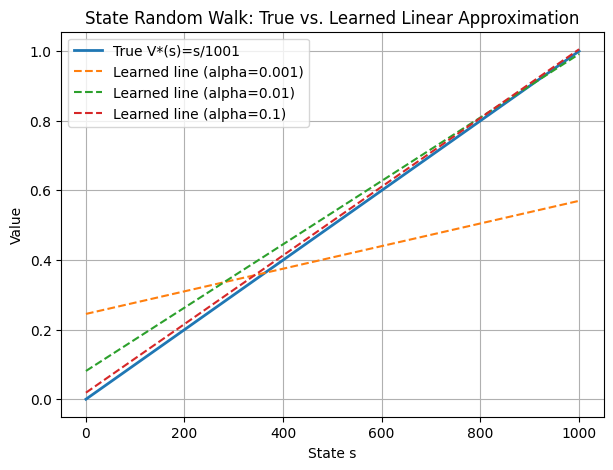

In [ ]:
run_experiment(alphas=(1e-3, 1e-2, 0.1), episodes=1000, seed=42, n_states = 1000, start_state=500)

alpha=0.001 -> w=[0.25607343 0.32831126], avg ep len=2615.6
alpha=0.01 -> w=[0.11966059 0.89014705], avg ep len=2615.6
alpha=0.1 -> w=[0.209766   0.93781501], avg ep len=2615.6


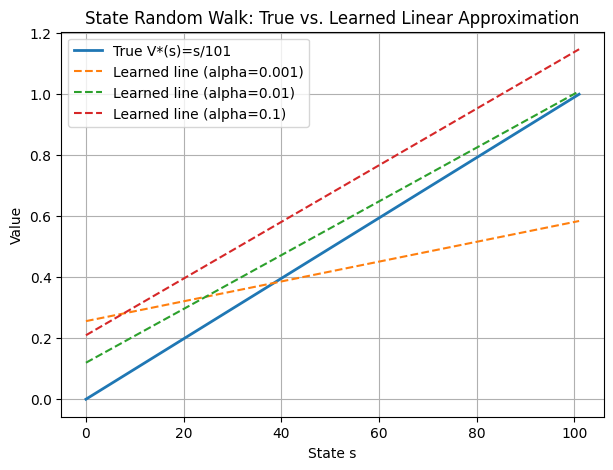

In [3]:
run_experiment(alphas=(1e-3, 1e-2, 0.1), episodes=1000, seed=42, n_states = 100, start_state=50)

  - How does the approximation behave for small vs large states?  
  - How does the learning rate affect convergence?

  **Discussion**
  For the values of alpha selected, the first plot shows that bigger values of alpha give a better correlation. I also tried bigger values of alpha (like 0.9, not plotted) and for values closer to 1 the results got worse, showing that there is an optimal value between 0 and 1. In the second plot, with a smaller number of states, the value of alpha = 0.01 perfomerd better than both other alphas. Therefore, it seems that the number of states and the optimal value of alpha are related. In conclusion, there should an optimal value of alpha of each number of states.

# Exercise 3: Solving MountainCar with Tile Coding and SARSA

## Problem Description
In this exercise, you will solve the **MountainCar-v0** environment from Gym using **tile coding** for function approximation and the **SARSA algorithm** for learning.  

The **Mountain Car problem**:
- A car is stuck in a valley and is too weak to drive straight up to the goal.  
- It must build momentum by going back and forth until it can reach the goal at `position >= 0.5`.  
- **State space**: continuous (position, velocity).  
- **Actions**: {0: push left, 1: no push, 2: push right}.  
- **Reward**: -1 per step until the goal is reached.  
- **Episode ends**: when the car reaches the goal or after 200 steps.  

---

## Step 1: Environment and Random Policy (with AI help)
- Use an **AI tool (e.g., ChatGPT)** to generate starter code for:
  - Creating the Gym environment (`MountainCar-v0`).  
  - Running a **random policy** (actions chosen randomly).  
- Run this code to confirm you can interact with the environment and see episode returns.  
- This will serve as a **baseline**.  
- **Important**: Do not use AI to implement the learning algorithm.  

---

## Step 2: SARSA Algorithm with Function Approximation
Implement **SARSA (on-policy TD control)** with the following steps:

For each episode:
1. Initialize state `s`.  
2. Choose action `a` using **ε-greedy** based on Q(s,a).  
3. For each step:  
   - Take action `a`, observe `(s_next, r, done)`.  
   - Choose next action `a_next` using ε-greedy from `s_next`.  
   - Compute TD target:  
     ```
     target = r + gamma * Q(s_next, a_next)
     ```  
     (if `s_next` is terminal, then target = r).  
   - Compute TD error:  
     ```
     delta = target - Q(s,a)
     ```  
   - Update weights:  
     ```
     w <- w + alpha * delta * x(s,a)
     ```  
   - Update `s = s_next`, `a = a_next`.  
4. End episode when the goal is reached or step limit is hit.  

---

## Step 3: Experiments
- Train the agent for 500–1000 episodes.  
- Plot **episode returns (sum of rewards)** vs episodes.  
- Compare with the random policy baseline:  
  - Does SARSA learn to consistently reach the goal?  
  - How many steps does it typically take?  

---

## Deliverables
- Python code for tile coding and SARSA.  
- Plot of returns vs episodes.  
- Plot the Value function
- Short discussion (1–2 paragraphs):  
  - Effect of tile coding parameters (number of tilings, resolution).


In [12]:
# You can use the following code for tiling

import numpy as np


class TileCoderXY:
    """
    A TileCoder for function approximation that applies tile coding on the x and y coordinates
    of a 3D state. Instead of providing tile widths, the user provides the number of tiles per
    dimension. The tile widths are computed based on the state bounds and the number of tiles.
    The z coordinate is not used.
    """

    def __init__(self, num_tilings, tiles_per_dim, state_low, state_high):
        """
        Initialize the TileCoderXY.

        Parameters:
            num_tilings (int): Number of overlapping tilings.
            tiles_per_dim (array-like of 2 ints): Number of tiles along the x and y dimensions.
            state_low (array-like of 2 floats): Lower bounds for the x and y dimensions.
            state_high (array-like of 2 floats): Upper bounds for the x and y dimensions.
        """
        self.num_tilings = num_tilings
        self.tiles_per_dim = np.array(tiles_per_dim, dtype=int)
        self.state_low = np.array(state_low, dtype=float)
        self.state_high = np.array(state_high, dtype=float)

        # Compute the tile width for each dimension.
        # We assume that the grid spans exactly from state_low to state_high.
        # When there are N tiles, there are N-1 intervals between the boundaries.
        self.tile_width = (self.state_high - self.state_low) / (self.tiles_per_dim - 1)

        # Precompute an offset for each tiling to create overlapping grids.
        # self.offsets = [(i / self.num_tilings) * self.tile_width for i in range(self.num_tilings)]
        # self.offsets = self.compute_8_offsets()
        # self.offsets = np.stack(self._compute_offsets(), axis=0)  # shape: (num_tilings, dims)
        # Precompute offsets for each tiling.
        # For tiling i:
        #   offset_x = (((i + 0) % num_tilings) / num_tilings) * tile_width[0]
        #   offset_y = (((i + 1) % num_tilings) / num_tilings) * tile_width[1]
        offsets = np.empty((self.num_tilings, 2))
        for i in range(self.num_tilings):
            offsets[i, 0] = (((i + 0) % self.num_tilings) / self.num_tilings) * self.tile_width[0]
            offsets[i, 1] = (((i + 1) % self.num_tilings) / self.num_tilings) * self.tile_width[1]
        self.offsets = offsets


        # Precompute multiplier for flattening a 2D index.
        # For grid shape (N, M), flat index = x_index * M + y_index.
        self.multiplier = self.tiles_per_dim[1]

        # Initialize a weight vector for each tiling.
        num_tiles = np.prod(self.tiles_per_dim)
        self.weights = [np.zeros(num_tiles) for _ in range(self.num_tilings)]

    def save(self, file_name):
        np.savez(file_name + ".npz", weights=self.weights)

    def load(self, file_name):
        self.weights = np.load(file_name+".npz")["weights"]


    def compute_8_offsets(self):
        """
        Compute a list of offsets using a combination of cardinal and diagonal directions.
        The offsets include:
          - Center: [0, 0]
          - Cardinal: right, left, up, down (half-tile shifts)
          - Diagonal: up-right, up-left, down-right, down-left (half-tile shifts)

        If the number of tilings exceeds the number of unique offsets (9), the list is repeated.

        Returns:
            List of 2-element numpy arrays representing the offset for each tiling.
        """
        half_tile = self.tile_width / 8.0
        base_offsets = [
            np.array([0.0, 0.0]),  # Center (no shift)
            np.array([half_tile[0], 0.0]),  # Right
            np.array([-half_tile[0], 0.0]),  # Left
            np.array([0.0, half_tile[1]]),  # Up
            np.array([0.0, -half_tile[1]]),  # Down
            np.array([half_tile[0], half_tile[1]]),  # Up-right
            np.array([-half_tile[0], half_tile[1]]),  # Up-left
            np.array([half_tile[0], -half_tile[1]]),  # Down-right
            np.array([-half_tile[0], -half_tile[1]])  # Down-left
        ]
        offsets = []
        for i in range(self.num_tilings):
            offsets.append(base_offsets[i % len(base_offsets)])
        return offsets

    def get_tile_indices(self, state):
        """
        Compute the active tile indices for all tilings given a 2D state.

        Parameters:
            state (array-like of length 2): The input state [x, y].

        Returns:
            List of tuples (tiling_index, flat_tile_index) for each tiling.
        """
        state = np.array(state, dtype=float)  # shape: (2,)
        # Compute shifted states for all tilings in one vectorized operation.
        # Shape of shifted: (num_tilings, 2)
        shifted = (state - self.state_low) + self.offsets

        # Compute tile coordinates (integer indices) for each tiling.
        # Division is broadcasted over the offsets.
        tile_coords = (shifted / self.tile_width).astype(int)  # shape: (num_tilings, 2)

        # Clip to ensure indices are within bounds.
        tile_coords[:, 0] = np.clip(tile_coords[:, 0], 0, self.tiles_per_dim[0] - 1)
        tile_coords[:, 1] = np.clip(tile_coords[:, 1], 0, self.tiles_per_dim[1] - 1)

        # Compute flat indices for each tiling.
        # flat_index = x_index * (tiles_per_dim[1]) + y_index
        flat_indices = tile_coords[:, 0] * self.tiles_per_dim[1] + tile_coords[:, 1]

        # Return a list of (tiling_index, flat_index) tuples.
        return list(zip(range(self.num_tilings), flat_indices))


    def predict(self, state):
        """
        Compute the approximated function value for a given 3D state using tile coding on x and y.

        Parameters:
            state (array-like): The input state [x, y, z].

        Returns:
            float: The function approximation (sum of weights for the active tiles).
        """
        active_tiles = self.get_tile_indices(state)
        return sum(self.weights[tiling][idx] for tiling, idx in active_tiles)

    def update(self, state, target, alpha):
        """
        Update the weights given a state and target value.

        Parameters:
            state (array-like): The input state [x, y, z].
            target (float): The target function value.
            alpha (float): The overall learning rate.
        """
        prediction = self.predict(state)
        error = target - prediction
        # Distribute the learning rate equally among all tilings.
        alpha_per_tiling = alpha / self.num_tilings

        active_tiles = self.get_tile_indices(state)
        for tiling, idx in active_tiles:
            self.weights[tiling][idx] += alpha_per_tiling * error





Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space:      Discrete(3)
Episode 01: return=-200.0, steps=200
Episode 02: return=-200.0, steps=200
Episode 03: return=-200.0, steps=200
Episode 04: return=-200.0, steps=200
Episode 05: return=-200.0, steps=200
Episode 06: return=-200.0, steps=200
Episode 07: return=-200.0, steps=200
Episode 08: return=-200.0, steps=200
Episode 09: return=-200.0, steps=200
Episode 10: return=-200.0, steps=200
Episode 11: return=-200.0, steps=200
Episode 12: return=-200.0, steps=200
Episode 13: return=-200.0, steps=200
Episode 14: return=-200.0, steps=200
Episode 15: return=-200.0, steps=200
Episode 16: return=-200.0, steps=200
Episode 17: return=-200.0, steps=200
Episode 18: return=-200.0, steps=200
Episode 19: return=-200.0, steps=200
Episode 20: return=-200.0, steps=200

=== Random Policy Summary ===
Episodes:        20
Avg return:      -200.00  (min -200.0, max -200.0)
Avg episode len: 200.0 steps


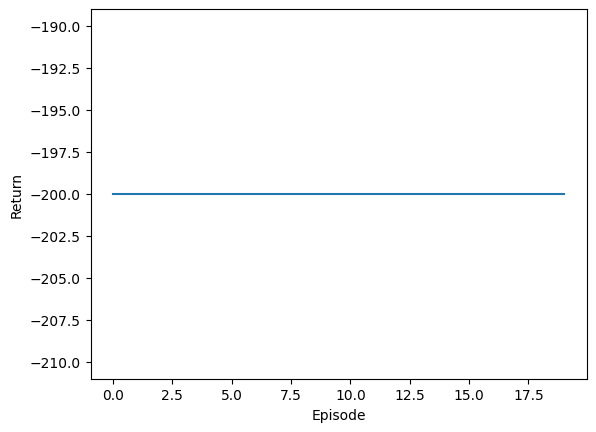

In [ ]:
# Baseline: MountainCar-v0 with a Random Policy (no learning)
# -----------------------------------------------------------
# Requirements:
#   pip install gymnasium[classic-control] numpy
# Optional (for a live window): pass render_mode="human" to gym.make

import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

ENV_ID = "MountainCar-v0"
SEED = 42
N_EPISODES = 20
MAX_STEPS = 200         # MountainCar-v0 terminates by 200 steps by default

def run_random_policy(env, n_episodes=N_EPISODES, max_steps=MAX_STEPS):
    episode_returns = []
    episode_lengths = []

    rng = np.random.default_rng(SEED)

    for ep in range(n_episodes):
        obs, info = env.reset(seed=SEED + ep)
        terminated = False
        truncated = False
        ep_return = 0
        steps = 0
        done = terminated or truncated

        while not (done):
            action = env.action_space.sample()
            obs, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            ep_return += reward
            steps += 1

            if steps >= max_steps:
                break

        episode_returns.append(ep_return)
        episode_lengths.append(steps)
        print(f"Episode {ep+1:02d}: return={ep_return:.1f}, steps={steps}")

    # Summary
    returns = np.array(episode_returns, dtype=float)
    lengths = np.array(episode_lengths, dtype=int)
    print("\n=== Random Policy Summary ===")
    print(f"Episodes:        {n_episodes}")
    print(f"Avg return:      {returns.mean():.2f}  (min {returns.min():.1f}, max {returns.max():.1f})")
    print(f"Avg episode len: {lengths.mean():.1f} steps")

    # Plot
    plt.plot(returns)
    plt.xlabel("Episode")
    plt.ylabel("Return")
    plt.show()
    return returns, lengths

if __name__ == "__main__":
    # For a live viewer, use render_mode='human'
    env = gym.make(ENV_ID)  # or: gym.make(ENV_ID, render_mode="human")

    # Inspect spaces (useful later for tile coding)
    print("Observation space:", env.observation_space)  # Box(low=[-1.2, -0.07], high=[0.6, 0.07], (2,), float32)
    print("Action space:     ", env.action_space)       # Discrete(3)

    returns, lengths = run_random_policy(env)

    env.close()


In [36]:
# SARSA for MountainCar (base copied from random)

import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

ENV_ID = "MountainCar-v0"
SEED = 42

# Tiles parameters
tiles_per_dim = [8,8]
epsilon = 0.05
gamma = 0.99

def epsilon_greedy(state, n_actions, v_hat):
    """Choose an action using epsilon-greedy policy."""
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)

    v_values = [v_hat[a].predict(state) for a in range(n_actions)]

    return np.argmax(v_values)

def run_SARSA(env, n_episodes=5000, max_steps=500, num_tilings=8):
    state_low = env.observation_space.low
    state_high = env.observation_space.high
    episode_returns = []
    episode_lengths = []
    episode_lengths_goal = []
    v_hat = []
    n_actions = env.action_space.n
    alpha = 0.1
    #########
    # The title code can recive an state (x,y) and returns a float, which is the function value. Since I need to give an state
    # and an action to update the funtion, then I need 3 different tile generation (one for each action)

    for i in range(n_actions):
        v_hat.append(TileCoderXY(num_tilings=num_tilings, tiles_per_dim=tiles_per_dim, state_low=state_low,state_high=state_high))

    #########

    for episode in range(n_episodes):
        state, _ = env.reset()
        terminated = False
        total_reward = 0
        steps = 0
        action = epsilon_greedy(state, n_actions, v_hat)

        while not (terminated):

            next_state, reward, terminated, _, info = env.step(action)
            total_reward += reward
            steps += 1

            if terminated:
                    target = reward
                    episode_lengths_goal.append(steps)
            else:
                next_action = epsilon_greedy(next_state, n_actions, v_hat)
                target   = reward + gamma * v_hat[next_action].predict(next_state)


            v_hat[action].update(state, target, alpha)
            state = next_state
            action = next_action

            if steps >= max_steps:
                break

        episode_returns.append(total_reward)
        episode_lengths.append(steps)

    print(f"Episode {episode+1:02d}: return={total_reward:.1f}")

    # Summary
    returns = np.array(episode_returns, dtype=float)
    lengths = np.array(episode_lengths, dtype=int)
    lengths_goal = np.array(episode_lengths_goal, dtype=int)
    print("\n=== Random Policy Summary ===")
    print(f"Episodes:        {n_episodes}")
    print(f"Avg return:      {returns.mean():.2f}  (min {returns.min():.1f}, max {returns.max():.1f})")
    print(f"Avg episode len: {lengths.mean():.1f} steps")
    print(f"Avg episode len to goal: {lengths_goal.mean():.1f} steps")

    # Plot
    plt.plot(returns)
    plt.xlabel("Episode")
    plt.ylabel("Return")
    plt.show()
    return v_hat


In [37]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_q_and_v(
    v_hat,
    pos_range=(-1.2, 0.6),
    vel_range=(-0.07, 0.07),
    grid_size=100,
    contours=True,
):
    """
    Visualize Q(s,a) and V(s)=max_a Q(s,a) over a (position, velocity) grid.

    Parameters
    ----------
    v_hat : list
        List of action-value approximators; v_hat[a].predict(state) -> float,
        where state is np.array([position, velocity], dtype=float32).
    pos_range : tuple(float, float)
        (min_position, max_position)
    vel_range : tuple(float, float)
        (min_velocity, max_velocity)
    grid_size : int
        Number of grid points per dimension (grid_size x grid_size).
    contours : bool
        Whether to overlay contour lines on V(s).

    Returns
    -------
    Q_maps : np.ndarray
        Array of shape (n_actions, grid_size, grid_size) with Q(s,a) values.
    V_map : np.ndarray
        Array of shape (grid_size, grid_size) with V(s)=max_a Q(s,a).
    """
    n_actions = len(v_hat)

    # ---- State-space grid ----
    pos_space = np.linspace(pos_range[0], pos_range[1], grid_size)
    vel_space = np.linspace(vel_range[0], vel_range[1], grid_size)
    P, V = np.meshgrid(pos_space, vel_space)  # shape: (grid_size, grid_size)

    # ---- Evaluate Q(s,a) over the grid ----
    Q_maps = np.zeros((n_actions, grid_size, grid_size), dtype=np.float32)
    for a in range(n_actions):
        for i in range(grid_size):
            for j in range(grid_size):
                state = np.array([P[i, j], V[i, j]], dtype=np.float32)
                Q_maps[a, i, j] = float(v_hat[a].predict(state))

    # ---- Compute V(s) = max_a Q(s,a) ----
    V_map = Q_maps.max(axis=0)

    # ---- Plot per-action heatmaps ----
    fig, axes = plt.subplots(1, n_actions, figsize=(5 * n_actions, 4), constrained_layout=True)
    if n_actions == 1:
        axes = [axes]

    for a, ax in enumerate(axes):
        im = ax.imshow(
            Q_maps[a],
            origin="lower",
            extent=[pos_space.min(), pos_space.max(), vel_space.min(), vel_space.max()],
            aspect="auto",
        )
        ax.set_title(f"Q(s, a={a})")
        ax.set_xlabel("Position")
        ax.set_ylabel("Velocity")
        plt.colorbar(im, ax=ax, label="Q-value")

    plt.show()

    # ---- Plot V(s) heatmap (+ contours) ----
    plt.figure(figsize=(6, 5))
    im = plt.imshow(
        V_map,
        origin="lower",
        extent=[pos_space.min(), pos_space.max(), vel_space.min(), vel_space.max()],
        aspect="auto",
    )
    plt.colorbar(im, label="V(s) = max_a Q(s,a)")
    if contours:
        plt.contour(P, V, V_map, levels=15, linewidths=0.7)
    plt.xlabel("Position")
    plt.ylabel("Velocity")
    plt.title("Value Function Approximation V(s)")
    plt.show()

    return Q_maps, V_map


Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space:      Discrete(3)
Episode 1000: return=-148.0

=== Random Policy Summary ===
Episodes:        1000
Avg return:      -159.95  (min -500.0, max -88.0)
Avg episode len: 159.9 steps
Avg episode len to goal: 153.0 steps


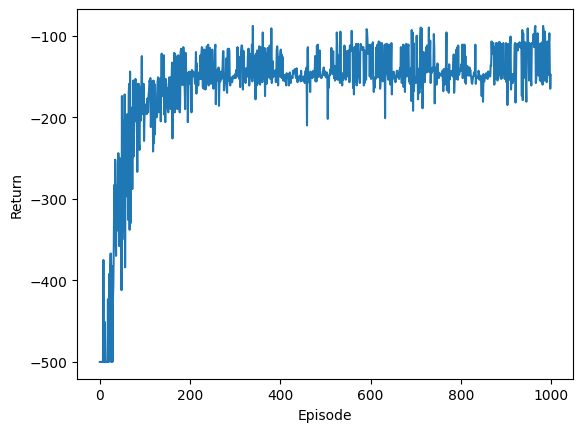

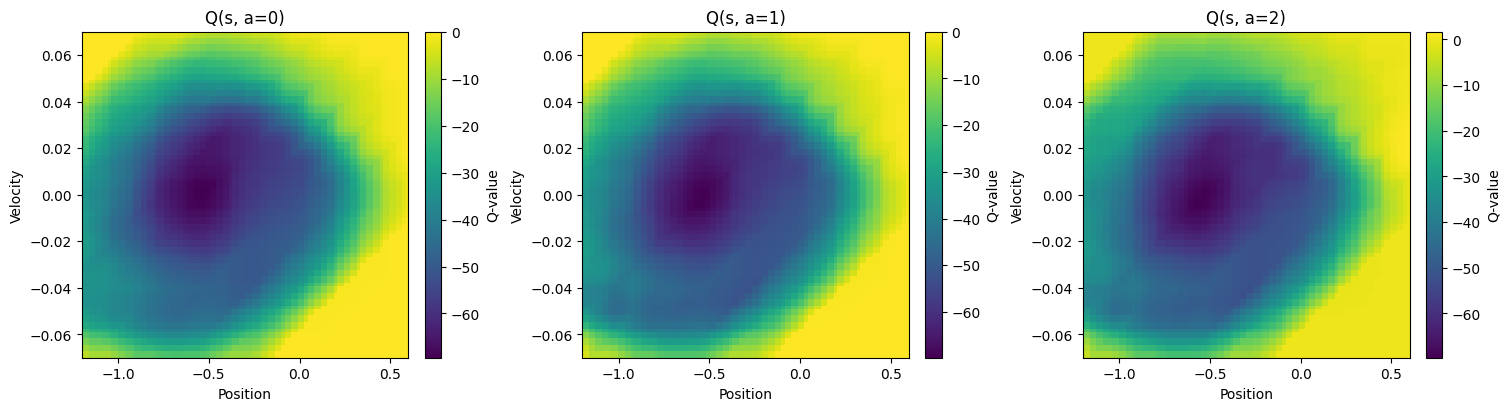

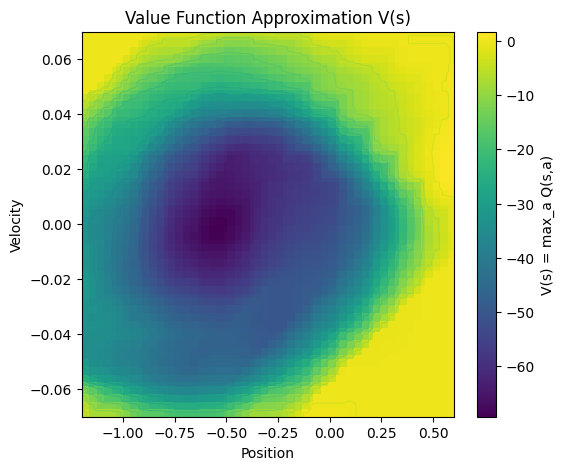

In [38]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

ENV_ID = "MountainCar-v0"
N_EPISODES = 1000
MAX_STEPS = 500
num_tilings = 8
# For a live viewer, use render_mode='human'
env = gym.make(ENV_ID)  # or: gym.make(ENV_ID, render_mode="human")

# Inspect spaces (useful later for tile coding)
print("Observation space:", env.observation_space)  # Box(low=[-1.2, -0.07], high=[0.6, 0.07], (2,), float32)
print("Action space:     ", env.action_space)       # Discrete(3)

v_hat = run_SARSA(env, n_episodes=N_EPISODES, max_steps=MAX_STEPS, num_tilings=num_tilings)
# After training:
Q_maps, V_map = visualize_q_and_v(v_hat, grid_size=100, contours=True)
env.close()

Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space:      Discrete(3)
Episode 1000: return=-178.0

=== Random Policy Summary ===
Episodes:        1000
Avg return:      -170.48  (min -500.0, max -97.0)
Avg episode len: 170.5 steps
Avg episode len to goal: 162.0 steps


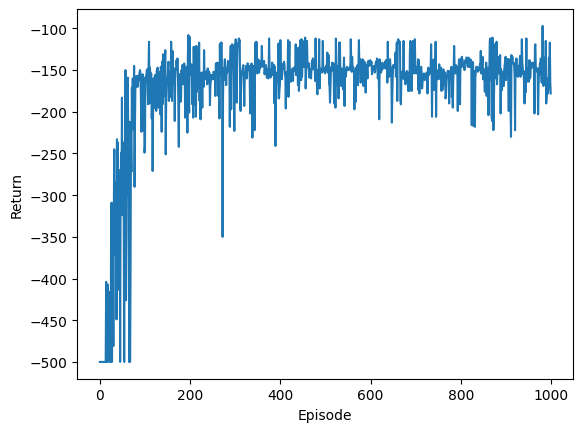

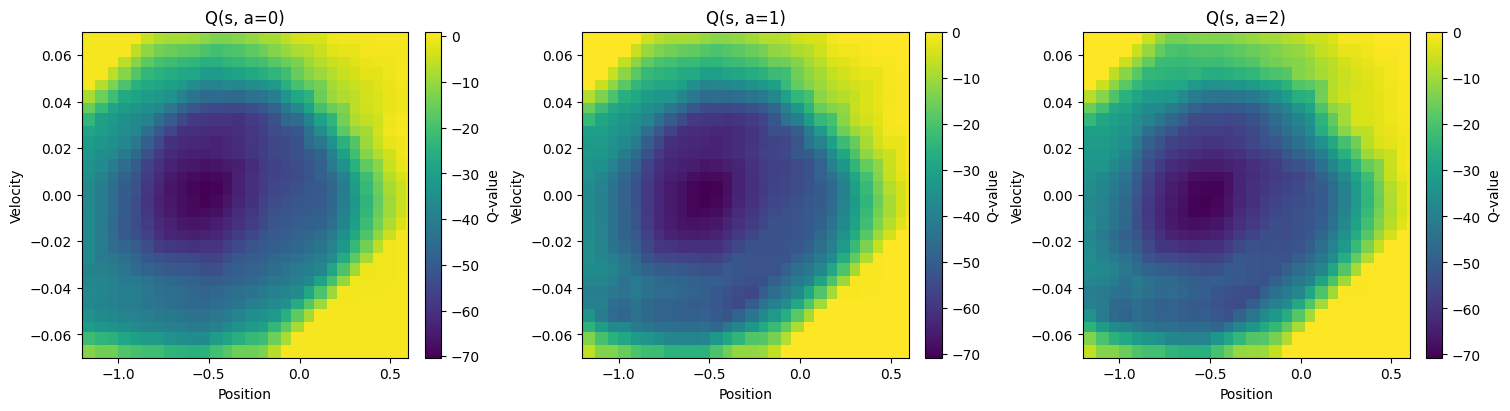

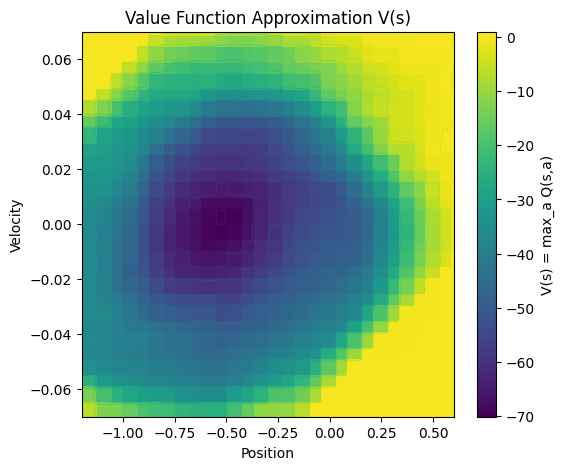

In [41]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

ENV_ID = "MountainCar-v0"
N_EPISODES = 1000
MAX_STEPS = 500
num_tilings = 4
# For a live viewer, use render_mode='human'
env = gym.make(ENV_ID)  # or: gym.make(ENV_ID, render_mode="human")

# Inspect spaces (useful later for tile coding)
print("Observation space:", env.observation_space)  # Box(low=[-1.2, -0.07], high=[0.6, 0.07], (2,), float32)
print("Action space:     ", env.action_space)       # Discrete(3)

v_hat = run_SARSA(env, n_episodes=N_EPISODES, max_steps=MAX_STEPS, num_tilings=num_tilings)
# After training:
Q_maps, V_map = visualize_q_and_v(v_hat, grid_size=100, contours=True)
env.close()

Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space:      Discrete(3)
Episode 1000: return=-154.0

=== Random Policy Summary ===
Episodes:        1000
Avg return:      -190.49  (min -500.0, max -94.0)
Avg episode len: 190.5 steps
Avg episode len to goal: 177.9 steps


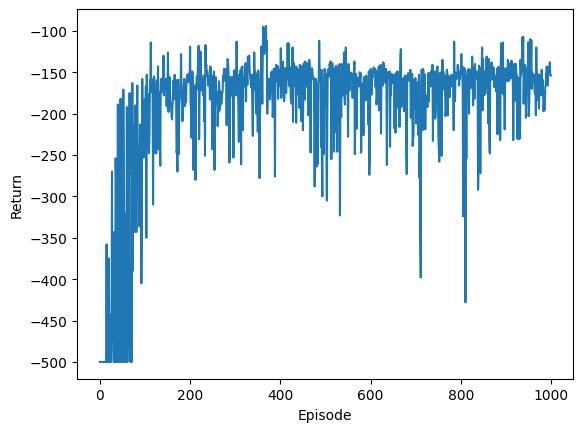

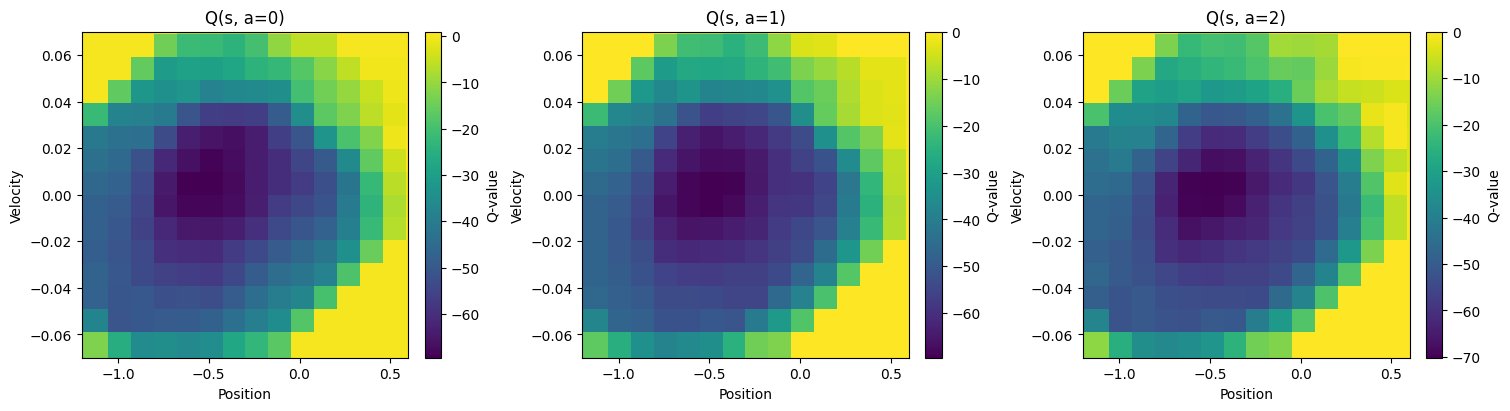

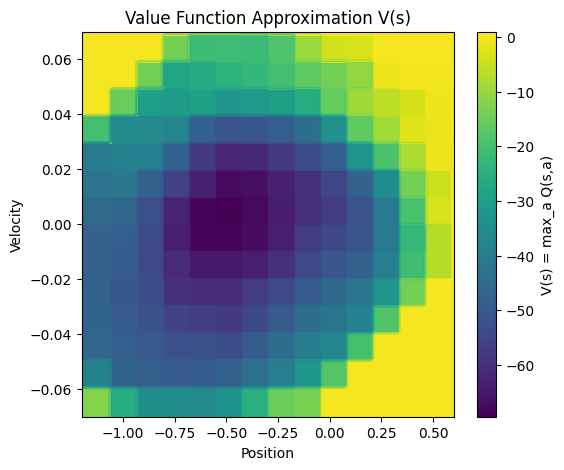

In [40]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

ENV_ID = "MountainCar-v0"
N_EPISODES = 1000
MAX_STEPS = 500
num_tilings = 2
# For a live viewer, use render_mode='human'
env = gym.make(ENV_ID)  # or: gym.make(ENV_ID, render_mode="human")

# Inspect spaces (useful later for tile coding)
print("Observation space:", env.observation_space)  # Box(low=[-1.2, -0.07], high=[0.6, 0.07], (2,), float32)
print("Action space:     ", env.action_space)       # Discrete(3)

v_hat = run_SARSA(env, n_episodes=N_EPISODES, max_steps=MAX_STEPS, num_tilings=num_tilings)
# After training:
Q_maps, V_map = visualize_q_and_v(v_hat, grid_size=100, contours=True)
env.close()

Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space:      Discrete(3)
Episode 1000: return=-149.0

=== Random Policy Summary ===
Episodes:        1000
Avg return:      -159.11  (min -500.0, max -86.0)
Avg episode len: 159.1 steps
Avg episode len to goal: 152.9 steps


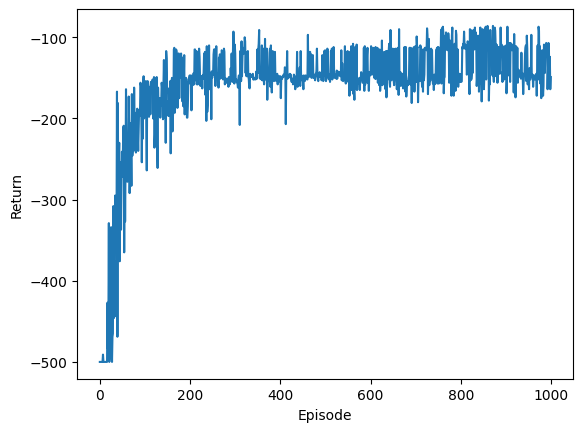

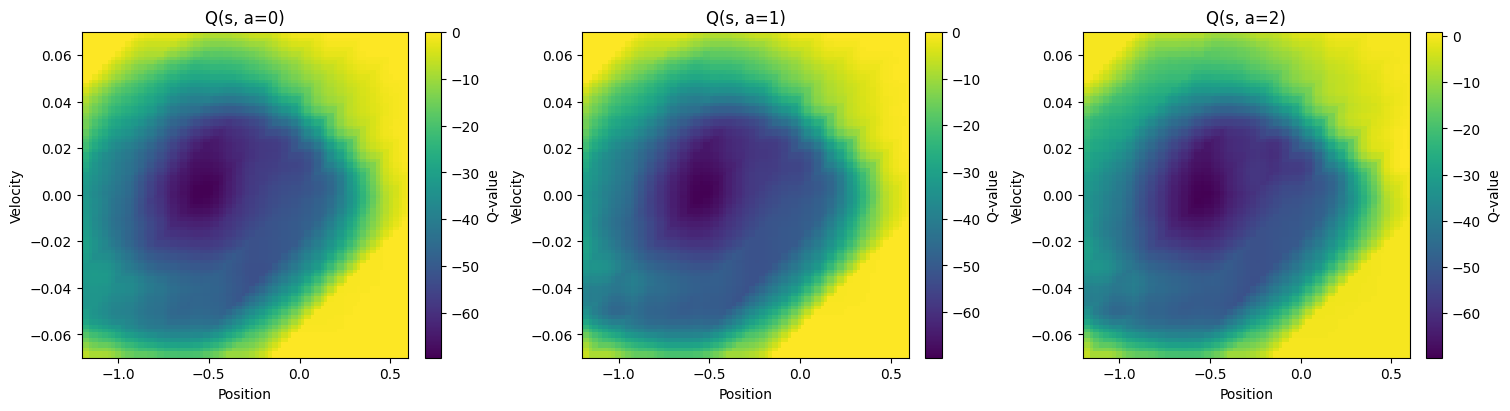

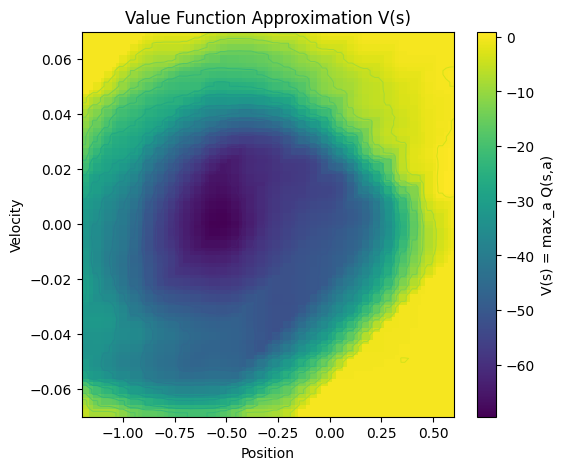

In [42]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

ENV_ID = "MountainCar-v0"
N_EPISODES = 1000
MAX_STEPS = 500
num_tilings = 10
# For a live viewer, use render_mode='human'
env = gym.make(ENV_ID)  # or: gym.make(ENV_ID, render_mode="human")

# Inspect spaces (useful later for tile coding)
print("Observation space:", env.observation_space)  # Box(low=[-1.2, -0.07], high=[0.6, 0.07], (2,), float32)
print("Action space:     ", env.action_space)       # Discrete(3)

v_hat = run_SARSA(env, n_episodes=N_EPISODES, max_steps=MAX_STEPS, num_tilings=num_tilings)
# After training:
Q_maps, V_map = visualize_q_and_v(v_hat, grid_size=100, contours=True)
env.close()

- Compare with the random policy baseline:  
  - Does SARSA learn to consistently reach the goal?  
  - How many steps does it typically take?  

- Short discussion (1–2 paragraphs):  
  - Effect of tile coding parameters (number of tilings, resolution).

**Discussion**
The random policy does not learn anything, so it will only reach the goal by luck. On the other hand, SARSA learns to consistently reach the goal after around 30 iterations.
The number of tiles used was reduced from 8, to 4 and finally to 2. Thee last 3 codes shows the results obtained respectively. As the number of tiles decreased, the average steps per episode increased. Also, the average of steps to reach the goal in case of success was also bigger:

- 8 tiles
    - Avg episode len: 159.9 steps
    - Avg episode len to goal: 153.0 steps.

- 4 tiles
    - Avg episode len: 170.5 steps
    - Avg episode len to goal: 162.0 steps

- 2 tiles
    - Avg episode len: 190.5 steps
    - Avg episode len to goal: 177.9 steps

Using more than 8 tiles improves barely the result. This shows than increasing the tiles to a number bigger than 8 is not justified:

- 10 tiles
    - Avg episode len: 159.1 steps
    - Avg episode len to goal: 152.9 steps